# King County Housing Price Prediction

Due to COVID-19, a lot of people are working remotely and have moved off to states with friendlier living cost.
However, before moving, we search the internet to find a house for the best price. Therefore, companies like Zillow and Streeteasy might want to make sure that their customers get the best deals for the house. In order to do that, they would need a crystal ball that would predict the scores. Unfortunatly, crystal balls do not exisit but thankfully, Data Scientist do and we can create a Machine Learning algorithm that can predict the housing price given certain features. 




In this project, I will be analyzing the three following things:
-1) Does the distance from downtown Seattle affect the housing price
-2) 

In [1]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

#set display parameters
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)


In [2]:
# import datafiles
training = pd.read_csv("kc_house_data_train.csv", index_col = 0)
holdout = pd.read_csv("kc_house_data_test_features.csv", index_col = 0)
imputed = pd.read_csv("bedroomsfilled.csv", index_col = 0)
extra = pd.read_csv("zip_code_extra_data_fixed.csv", index_col = 0)
date = pd.read_csv("date.csv", index_col = 0)

### Checking out the Sales dataframe

In [3]:
print(training.shape) #training and testing df to create a model for prediction
print(holdout.shape) #applying the model to predict the sales for the houses
print(imputed.shape) #missing data for 12 rows (no bedrooms)
#print(extra.shape) # extra data on the 70 zipcodes from https://www.unitedstateszipcodes.org/
print(date.shape) # date from the training datafile. 
sales = training.copy()
prices=pd.DataFrame(sales["price"])
sales.head()

(17290, 21)
(4323, 20)
(12, 21)
(17290, 1)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
holdout

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,263000018,20140521T000000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
4319,6600060120,20150223T000000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
4320,1523300141,20140623T000000,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
4321,291310100,20150116T000000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
sales.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028
17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,0,4,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910


In [6]:
sales.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [8]:
corr = sales.corr()

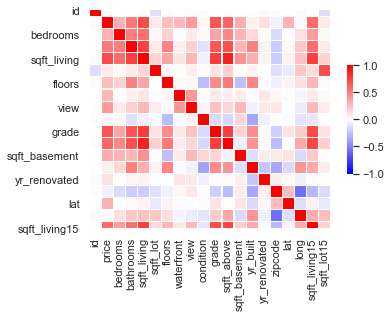

In [9]:
sns.heatmap(corr, cmap="bwr", vmax=1, vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5})

In [10]:

sales.drop(columns=["id","date"], inplace = True) #Dropping "id" since it does not affect the price. "Date" is also being removed. 
holdout.drop(columns=["id","date"], inplace = True) #Dropping it to make sure they are the same

In [11]:
X = sales.drop(columns = "price")
y = sales.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
original_mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print(model_score)
print(original_mse)
print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Oreiginal Root Mean Squared Error: ", original_mse**(1/2))

0.7027786929887444
39547299966.78107
Mae:  85742.0843877308
R Square               :  0.7027786929887444
Oreiginal Root Mean Squared Error:  198865.02952198777


# Naive model: R_square of 0.702778 and RMSE of 198865.0295

In [12]:
def multicolinear_features(data):
    df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df['pairs'] = list(zip(df.level_0, df.level_1))
    df.set_index(['pairs'], inplace = True)
    df.drop(columns=['level_1', 'level_0'], inplace = True)
    df.columns = ['cc'] #correlation column
    df.drop_duplicates(inplace=True)
    return df[(df.cc>.9) & (df.cc<1) ]

multicolinear_features(sales) #checking for multicolinearity

,cc
pairs,


In [13]:
sales[sales["bedrooms"]== 0]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,265000.0,0,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
10074,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [14]:
sales["bedrooms"].max()

33

In [15]:
print(sales.shape, imputed.shape)

(17290, 19) (12, 21)


In [16]:
sales.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
imputed #dataframe with information on the missing bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
483,3374500520,20150429T000000,355000.0,4,2.50,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
1120,6306400140,20140612T000000,1095000.0,5,3.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
2430,1222029077,20141029T000000,265000.0,1,0.75,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
3032,7849202190,20141223T000000,235000.0,3,2.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
3609,2569500210,20141117T000000,339950.0,4,3.00,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
5424,3918400017,20150205T000000,380000.0,3,2.50,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
6409,1453602309,20140805T000000,288000.0,2,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
9286,2954400190,20140624T000000,1295650.0,4,4.50,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
10067,3980300371,20140926T000000,142000.0,1,0.75,290,20875,1.0,0,0,1,1,290,0,1954,0,98024,47.5308,-121.888,1620,22850
10074,2310060040,20140925T000000,240000.0,4,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685


In [18]:
print(sales.shape, imputed.shape)

(17290, 19) (12, 21)


In [19]:
imputed.drop(columns=["id","date"], inplace = True)           # dropping 2 columns to match sales and id does not really affect the model.

In [20]:
imputed.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [21]:
print(sales.shape, imputed.shape) # checking to make sure both dataframes have the same amount of columns for the merge

(17290, 19) (12, 19)


# Merging Bedroom data for 12 rows and removing bedroom outliers

In [22]:
def filled_data(df,df2):
    index=df.loc[df.bedrooms == 0].index.to_list()
    df.drop(df.index[[index]], inplace=True)
    frames= [df, df2]
    train = pd.concat(frames)
    return train
sales=filled_data(sales, imputed)

In [23]:
print(sales.shape)


(17290, 19)


In [24]:
sales["bedrooms"].sort_values(ascending = False)

8597     33
2356     11
3680     10
11181    10
17114    10
         ..
15342     1
7846      1
14292     1
4298      1
9268      1
Name: bedrooms, Length: 17290, dtype: int64

In [25]:
# removes outliers - bedrooms  > 10

def cap_max(x, n, data, column):
    """
    x = the column number
    n = min number
    data = dataframe
    column = interested column from dataframe
    should be applied in a lambda function.
    For example: sales["bedrooms"].apply(lambda x: cutoff(x,10,sales,"bedrooms"))
    """
    if x > n:
        return data[column].median()
    else:
        return x
sales["bedrooms"]= sales["bedrooms"].apply(lambda x: cap_max(x,10,sales,"bedrooms"))   
holdout["bedrooms"]= holdout["bedrooms"].apply(lambda x: cap_max(x,10,sales,"bedrooms"))  

In [26]:
sales["bedrooms"].sort_values(ascending = False)

3680     10.0
11181    10.0
17114    10.0
14156     9.0
3425      9.0
         ... 
4411      1.0
7474      1.0
11716     1.0
7482      1.0
3186      1.0
Name: bedrooms, Length: 17290, dtype: float64

In [27]:
sales["bathrooms"].sort_values(ascending = True)

9060     0.00
12982    0.00
7093     0.50
4622     0.50
12674    0.50
         ... 
15816    6.75
3425     7.50
7519     7.75
3275     8.00
10366    8.00
Name: bathrooms, Length: 17290, dtype: float64

In [28]:
def cap_min(x, n, data, column):
    """
    x = the column number
    n = min number
    data = dataframe
    column = interested column from dataframe
    should be applied in a lambda function.
    For example: sales["bedrooms"].apply(lambda x: cutoff(x,10,sales,"bedrooms"))
    """
    if x == n:
        return data[column].median()
    else:
        return x

In [29]:
sales["bathrooms"]= sales["bathrooms"].apply(lambda x: cap_min(x,0,sales,"bedrooms"))  
holdout["bathrooms"]= holdout["bathrooms"].apply(lambda x: cap_min(x,0,sales,"bedrooms"))  

In [30]:
holdout["bathrooms"].sort_values(ascending = True)

4322    0.75
694     0.75
1700    0.75
723     0.75
1191    0.75
        ... 
3760    6.00
4054    6.00
1012    6.25
4216    6.50
3288    6.50
Name: bathrooms, Length: 4323, dtype: float64

In [31]:
sales.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,865000.0,5.0,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,1038000.0,4.0,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,1490000.0,3.0,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,711000.0,3.0,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [32]:
sales.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [33]:
multicolinear_features(sales)

,cc
pairs,


In [34]:
multicolinear_features(sales.drop(columns = ["sqft_above"]))

,cc
pairs,


# Checking the effect of the new data additions

In [35]:
X = sales.drop(columns = ["price"])
y = sales.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print(model_score)
print(mse)
print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

0.6906955354973479
43818591445.58683
Mae:  91521.51749724802
R Square               :  0.6906955354973479
Root Mean Squared Error:  209328.90733385782


# Adding More Data

In [37]:
training_data = pd.merge(sales, extra, how='right', on='zipcode')
holdout = pd.merge(holdout, extra, how='right', on='zipcode')

In [38]:
training_data.shape

(17290, 73)

In [39]:
training_data = pd.merge(training_data, date, how = "outer", left_index=True, right_index=True)
holdout = pd.merge(holdout, date, how = "outer", left_index=True, right_index=True)

In [40]:
training_data.shape

(17290, 74)

In [41]:
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,date
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,20141006T000000
1,455000.0,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,20140821T000000
2,273000.0,3.0,1.75,2050,9045,2.0,0,0,4,6,2050,0,1959,0,98058,47.4572,-122.180,1200,9045,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,20140815T000000
3,223000.0,2.0,1.00,910,9869,1.0,0,0,3,6,910,0,1957,0,98058,47.4572,-122.184,1480,9750,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,20150331T000000
4,335500.0,5.0,3.00,2240,19090,1.0,0,0,4,8,1700,540,1968,0,98058,47.4416,-122.149,2280,20000,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,20140714T000000


In [42]:
# missing = list(set(data_fin.columns.to_list()) - set(holdout.columns.to_list()))

NameError: name 'data_fin' is not defined

In [43]:
# missing

In [44]:
training_data["month"] = pd.DatetimeIndex(training_data["date"]).month
holdout["month"]= pd.DatetimeIndex(holdout["date"]).month

training_data.drop(columns=["date"], inplace = True)
holdout.drop(columns=["date"], inplace = True)

In [45]:
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10
1,455000.0,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8
2,273000.0,3.0,1.75,2050,9045,2.0,0,0,4,6,2050,0,1959,0,98058,47.4572,-122.180,1200,9045,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8
3,223000.0,2.0,1.00,910,9869,1.0,0,0,3,6,910,0,1957,0,98058,47.4572,-122.184,1480,9750,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,3
4,335500.0,5.0,3.00,2240,19090,1.0,0,0,4,8,1700,540,1968,0,98058,47.4416,-122.149,2280,20000,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,7


#### Checking the numbers again on the new Dataframe. 

In [46]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)


print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8045807787590269
Root Mean Squared Error:  154482.54436648844


In [48]:
training_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.00000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.407395e+05,3.372412,2.113201,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.791498,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,11384.356044,6907.222672,6939.445807,12432.798381,1758.310295,9.558647,56.258068,883.609717,972.360555,1588.785252,8023.597513,1775.798265,6521.753557,2742.313418,682.350087,520.536842,4161.595084,972.573106,538.17941,348.761365,24.574031,185.491498,36.427820,93.274783,0.276460,170.952342,30251.528282,19.578890,8.391556,95.125217,3.467438,3.119607,172.215963,6090.998149,1624.427241,4611.644997,859.758300,5893.550781,1633.475188,3536.524696,1263.519722,15196.527183,15481.362811,37.953326,37.111047,38.660382,30677.889994,4282.927010,13186.828687,4.125661e+05,21.753359,1.150792,12327.070388,81128.612377,6.570561
std,3.733190e+05,0.906370,0.769544,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343734,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,4379.029480,3034.579357,2708.574493,4793.642243,1457.802620,16.657164,44.757148,1066.050418,474.862849,1312.944479,3883.242895,766.535635,3149.257748,1790.331918,525.530251,519.204309,1939.617255,522.099187,347.96309,259.957396,22.611228,129.285062,14.452145,85.102427,1.657331,68.799165,10988.712277,105.955117,24.090868,123.785855,8.793063,33.460879,153.846878,2241.409157,651.481983,2928.098098,469.361705,2273.457239,793.763526,2053.559103,953.444056,5557.319447,5614.135527,3.585994,3.396749,3.764357,11156.470658,2937.671266,5068.856595,1.327351e+05,54.355985,1.416894,4740.827849,24251.985079,3.116999
min,7.500000e+04,1.000000,0.500000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,807.000000,385.000000,953.000000,890.000000,34.000000,0.000000,0

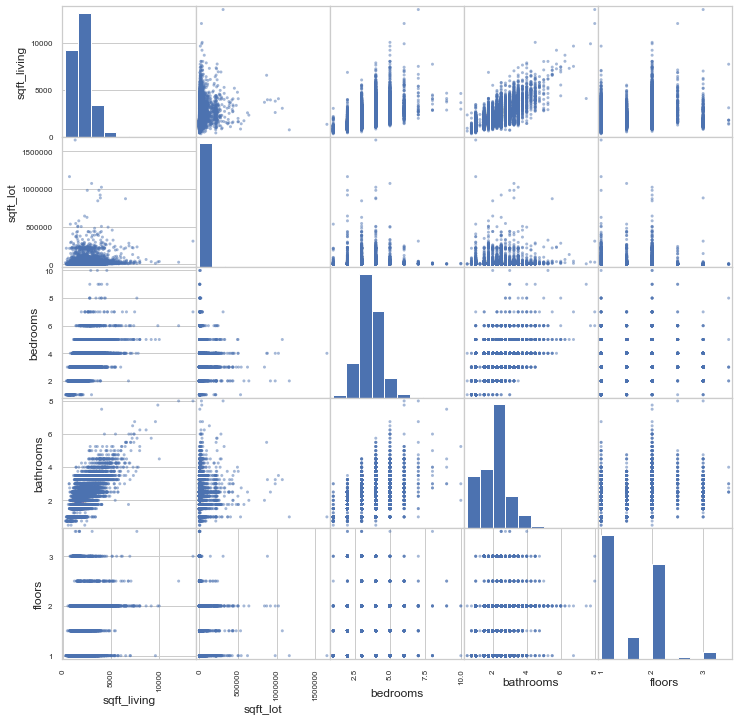

In [49]:
pd.plotting.scatter_matrix(training_data[["sqft_living", "sqft_lot","bedrooms","bathrooms","floors"]],figsize  = (12, 12));
plt.show()

In [50]:
categorical =['bedrooms', 'view', 'waterfront', 'bathrooms', 'floors','condition',
              'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'month']

non_cat = ['sqft_living','sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']

target = "price"

predictor = "Mix of categorical and non categorical"

In [51]:
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(training_data, size=6)
# g.set(xticklabels=[]);

In [52]:
training_data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10
1,455000.0,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8


In [53]:
# from geopy.distance import geodesic
# downtown = (47.609862, -122.342056) 
# training_data['coords'] = tuple(zip(training_data['lat'],training_data['long']))
# x = training_data['coords'].apply(lambda x: geodesic(downtown,x))
# training_data['miles_from_downtown'] = x.astype(str).str[:-3].astype(float)

# holdout
# holdout['coords'] = tuple(zip(holdout['lat'],holdout['long']))
# x = holdout['coords'].apply(lambda x: geodesic(downtown,x))
# holdout['miles_from_downtown'] = x.astype(str).str[:-3].astype(float)




In [54]:
corra=training_data.corr()

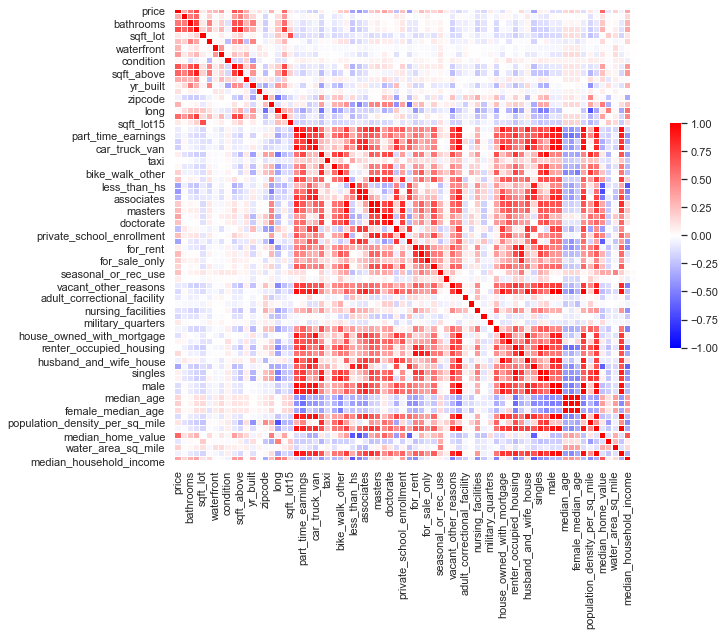

In [55]:

fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)


sns.heatmap(corra, cmap="bwr", vmax=1,vmin=-1, center=0, square = True,
             linewidths=.1, cbar_kws={"shrink": .5});

In [56]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 74 columns):
price                             17290 non-null float64
bedrooms                          17290 non-null float64
bathrooms                         17290 non-null float64
sqft_living                       17290 non-null int64
sqft_lot                          17290 non-null int64
floors                            17290 non-null float64
waterfront                        17290 non-null int64
view                              17290 non-null int64
condition                         17290 non-null int64
grade                             17290 non-null int64
sqft_above                        17290 non-null int64
sqft_basement                     17290 non-null int64
yr_built                          17290 non-null int64
yr_renovated                      17290 non-null int64
zipcode                           17290 non-null int64
lat                               17290 non-null float64
l

In [57]:
# training_data.drop(columns = "coords", inplace = True)
# holdout.drop(columns = "coords", inplace = True)

In [58]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8045807787590269
Root Mean Squared Error:  154482.54436648844


# Data Visualizations on Contineous Features:


In [60]:
training_data["price"].max() 

7700000.0

In [61]:
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10
1,455000.0,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8
2,273000.0,3.0,1.75,2050,9045,2.0,0,0,4,6,2050,0,1959,0,98058,47.4572,-122.180,1200,9045,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8
3,223000.0,2.0,1.00,910,9869,1.0,0,0,3,6,910,0,1957,0,98058,47.4572,-122.184,1480,9750,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,3
4,335500.0,5.0,3.00,2240,19090,1.0,0,0,4,8,1700,540,1968,0,98058,47.4416,-122.149,2280,20000,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,7


# Statistics to Determine the features

In [62]:
training_data["house_years"] = abs(training_data["yr_renovated"]-training_data["yr_built"])
holdout["house_years"] = abs(holdout["yr_renovated"]-holdout["yr_built"])

holdout["house_age_2015"] = 2015 - holdout["yr_built"] # age of the house by 25 with or without renovation. 

In [63]:
training_data.shape

(17290, 75)

In [64]:
training_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month,house_years
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10,1986
1,455000.0,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,1959
2,273000.0,3.0,1.75,2050,9045,2.0,0,0,4,6,2050,0,1959,0,98058,47.4572,-122.180,1200,9045,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,1959
3,223000.0,2.0,1.00,910,9869,1.0,0,0,3,6,910,0,1957,0,98058,47.4572,-122.184,1480,9750,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,3,1957
4,335500.0,5.0,3.00,2240,19090,1.0,0,0,4,8,1700,540,1968,0,98058,47.4416,-122.149,2280,20000,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,7,1968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,1950000.0,4.0,3.75,4150,17424,1.0,0,0,3,9,3130,1020,1963,2000,98039,47.6390,-122.236,3930,21420,807,385,953,890,34,0,0,40,57,12,290,68,922,388,146,51,555,355,32,13,0,32,9,19,0,28,2971,0,0,0,0,0,0,567,379,116,101,777,89,172,24,1468,1503,46,45,46,2971,2059,1163,1000001.0,1.44,4.30,1062,183833.0,3,37
17286,2450000.0,7.0,4.25,4670,23115,2.0,0,2,3,11,4670,0,1992,0,98039,47.6183,-122.227,3240,13912,807,385,953,890,34,0,0,40,57,12,290,68,922,388,146,51,555,355,32,13,0,32,9,19,0,28,2971,0,0,0,0,0,0,567,379,116,101,777,89,172,24,1468,1503,46,45,46,2971,2059,1163,1000001.0,1.44,4.30,1062,183833.0,5,1992
17287,2100000.0,4.0,1.75,3550,19865,2.0,0,0,3,9,3550,0,1962,2002,98039,47.6236,-122.235,3000,19862,807,385,953,890,34,0,0,40,57,12,290,68,922,388,146,51,555,355,32,13,0,32,9,19,0,28,2971,0,0,0,0,0,0,567,379,116,101,777,89,172,24,1468,1503,

In [65]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8045998345419895
Root Mean Squared Error:  154482.54436648844


In [66]:

yes_waterfront = training_data[training_data["waterfront"]==1]
no_waterfront = training_data[training_data["waterfront"]==0]

yes_waterfront_holdout = holdout[training_data["waterfront"]==1]
no_waterfront_holdout = holdout[training_data["waterfront"]==0]

In [67]:
print(training_data.shape)
print(holdout.shape)

(17290, 75)
(17290, 75)


# Statistics on Categorical Features

In [68]:
holdout.dropna(inplace = True)

In [69]:
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
stats.ttest_ind(yes_waterfront.price, no_waterfront.price) #Waterfront has a statistically significant difference on price. 

Ttest_indResult(statistic=37.72330429549608, pvalue=2.465038317654299e-299)

In [70]:
# View - an index from 0-4 of how good the view of the propert was (0 = horrible, 4 = great)
good_view = training_data[training_data["view"]>=3]
bad_view = training_data[training_data["view"]<=2]

good_view_holdout = holdout[holdout["view"]>=3]
bad_view_holdout = holdout[holdout["view"]<=2]

In [71]:
stats.ttest_ind(good_view.price, bad_view.price) #View has a statistically significant difference on price. 

Ttest_indResult(statistic=47.664984739824035, pvalue=0.0)

In [72]:
training.floors.value_counts()

1.0    8606
2.0    6538
1.5    1524
3.0     475
2.5     140
3.5       7
Name: floors, dtype: int64

In [73]:
formula = 'price~C(floors)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

                 sum_sq       df           F  PR(>F)
C(floors)  2.059096e+14      5.0  323.010561     0.0
Residual   2.203607e+15  17284.0         NaN     NaN


In [74]:
training_data.groupby("floors").price.mean()


floors
1.0    4.434050e+05
1.5    5.525950e+05
2.0    6.504333e+05
2.5    1.094988e+06
3.0    5.861594e+05
3.5    1.004500e+06
Name: price, dtype: float64

In [75]:
formula = 'price~C(grade)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

                sum_sq       df            F  PR(>F)
C(grade)  1.274417e+15     11.0  1763.511029     0.0
Residual  1.135100e+15  17278.0          NaN     NaN


In [76]:
training_data.groupby("grade").price.mean()

grade
1     1.420000e+05
3     1.685000e+05
4     2.106386e+05
5     2.438372e+05
6     3.026820e+05
7     4.025267e+05
8     5.430105e+05
9     7.741618e+05
10    1.072903e+06
11    1.507967e+06
12    2.314347e+06
13    4.002727e+06
Name: price, dtype: float64

In [77]:
def ones_greater_zeros(grade):
    if grade >= 10:
        return 1
    else:
        return 0

training_data["good_grade"]= training_data["grade"].apply(ones_greater_zeros)
holdout["good_grade"]= holdout["grade"].apply(ones_greater_zeros)

In [78]:
training_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month,house_years,good_grade
0,365000.0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10,1986,0
1,455000.0,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,1959,0
2,273000.0,3.0,1.75,2050,9045,2.0,0,0,4,6,2050,0,1959,0,98058,47.4572,-122.180,1200,9045,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,1959,0
3,223000.0,2.0,1.00,910,9869,1.0,0,0,3,6,910,0,1957,0,98058,47.4572,-122.184,1480,9750,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,3,1957,0
4,335500.0,5.0,3.00,2240,19090,1.0,0,0,4,8,1700,540,1968,0,98058,47.4416,-122.149,2280,20000,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,7,1968,0


In [79]:
training_data.good_grade.value_counts()

0    15995
1     1295
Name: good_grade, dtype: int64

In [80]:
formula = 'price~C(no_earnings)'
lm = ols(formula, training_data).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table) 

                      sum_sq       df           F  PR(>F)
C(no_earnings)  9.673067e+14     69.0  167.386197     0.0
Residual        1.442210e+15  17220.0         NaN     NaN


In [81]:
training_data.groupby(["no_earnings", "zipcode"]).price.mean()

no_earnings  zipcode
953          98039      2.202790e+06
1154         98010      4.248736e+05
1253         98024      5.909915e+05
1348         98014      4.562057e+05
1605         98065      5.272174e+05
2410         98045      4.313185e+05
2418         98019      4.284222e+05
2500         98148      2.720823e+05
2836         98102      9.336715e+05
2870         98070      4.956727e+05
2980         98136      5.659156e+05
3350         98107      5.834824e+05
3398         98109      8.759879e+05
3472         98077      6.768898e+05
3825         98119      8.712724e+05
3961         98075      7.939692e+05
3964         98199      7.871469e+05
4305         98112      1.119458e+06
4636         98005      8.088476e+05
4675         98126      4.250761e+05
4711         98055      3.068521e+05
4720         98072      5.667307e+05
4773         98117      5.701880e+05
4913         98166      4.793758e+05
4998         98028      4.684170e+05
5137         98116      6.150221e+05
5292         9807

In [82]:
training_data.shape

(17290, 76)

In [83]:
# formula = 'price~miles_from_downtown'
# lm = ols(formula, training_data).fit()
# table = sm.stats.anova_lm(lm, typ=2)
# print(table) 

In [84]:
X = training_data.drop(columns = "price")
y = training_data.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8119960134025007
Root Mean Squared Error:  154482.54436648844


In [85]:
waterfront_dummies = pd.get_dummies(training_data["waterfront"], prefix="wfront",  drop_first = True)
view_dummies = pd.get_dummies(training_data["view"], prefix="view", drop_first = True)
grade_dummies = pd.get_dummies(training_data["grade"], prefix="grade",  drop_first = True)
zipcode_dummies = pd.get_dummies(training_data["zipcode"], prefix="zipcode",  drop_first = True)
bedroom_dummies = pd.get_dummies(training_data["bedrooms"], prefix="rooms",  drop_first = True)
bathroom_dummies = pd.get_dummies(training_data["bathrooms"], prefix="bathrooms", drop_first = True)
month_dummies = pd.get_dummies(training_data["month"], prefix="month", drop_first = True)


waterfront_dummies_holdout = pd.get_dummies(holdout["waterfront"], prefix="wfront",  drop_first = True)
view_dummies_holdout = pd.get_dummies(holdout["view"], prefix="view", drop_first = True)
grade_dummies_holdout = pd.get_dummies(holdout["grade"], prefix="grade",  drop_first = True)
zipcode_dummies_holdout = pd.get_dummies(holdout["zipcode"], prefix="zipcode",  drop_first = True)
bedroom_dummies_holdout = pd.get_dummies(holdout["bedrooms"], prefix="rooms",  drop_first = True)
bathroom_dummies_holdout = pd.get_dummies(holdout["bathrooms"], prefix="bathrooms", drop_first = True)
month_dummies_holdout = pd.get_dummies(holdout["month"], prefix="month", drop_first = True)

In [86]:
data_fin = pd.concat([training_data, waterfront_dummies, view_dummies, grade_dummies, zipcode_dummies , bedroom_dummies, bathroom_dummies, month_dummies], axis=1)
holdout = pd.concat([holdout, waterfront_dummies_holdout, view_dummies_holdout, grade_dummies_holdout, zipcode_dummies_holdout , bedroom_dummies_holdout, bathroom_dummies_holdout, month_dummies_holdout], axis=1)

In [87]:
data_fin.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
              ..
month_8        0
month_9        0
month_10       0
month_11       0
month_12       0
Length: 209, dtype: int64

In [88]:
holdout.columns.to_list()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'full_time_earnings',
 'part_time_earnings',
 'no_earnings',
 'car_truck_van',
 'public_transportation',
 'taxi',
 'motorcycle',
 'bike_walk_other',
 'work_home',
 'less_than_hs',
 'high_school_grad',
 'associates',
 'bachelors',
 'masters',
 'professional_school_degree',
 'doctorate',
 'public_school_enrollment',
 'private_school_enrollment',
 'no_school_enrollment',
 'for_rent',
 'rented_and_unoccupied',
 'for_sale_only',
 'sold_and_unoccupied',
 'seasonal_or_rec_use',
 'migrant_worker_housing',
 'vacant_other_reasons',
 'in_occupied_housing_units',
 'adult_correctional_facility',
 'juvenile_facilities',
 'nursing_facilities',
 'other_institutional',
 'military_quarters',
 'other_noninstitutional',
 'house_owned_with_mortgage',
 'house_owned_outri

In [89]:
print(data_fin.shape)
print(holdout.shape)


(17290, 209)
(4323, 203)


# Linear Regression with SelectKBest

In [90]:
X = data_fin.drop(columns = "price")
y = data_fin.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8426410323678369
Root Mean Squared Error:  154482.54436648844


In [91]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=205)

selector.fit(X_train, y_train)

SelectKBest(k=205, score_func=<function f_regression at 0x1a1a283b70>)

In [92]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [93]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 151170.0825448117
Testing Root Mean Squared Error: 138632.3540953521


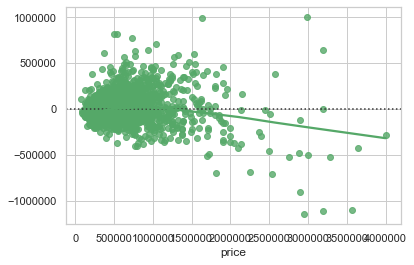

In [94]:
sns.residplot(y_test, y_kbest,lowess=True, color="g");

there is heteroscadasticity.

# Generating Log Transformations and Interaction Features

In [95]:
# data_log = pd.DataFrame([])
# data_log['log_above'] = np.log(training_data['sqft_above'])
# data_log['log_living'] = np.log(training_data['sqft_living'])
# data_log['log_living15'] = np.log(training_data['sqft_living15'])
# data_log['log_lot'] = np.log(training_data['sqft_lot'])
# data_log['log_lot15'] = np.log(training_data['sqft_lot15'])
# # data_log.hist(figsize  = [6, 6]);

In [96]:
# training_data_dummies = pd.merge(training_data, data_log, how = "outer", left_index=True, right_index=True)

In [97]:
# training_data_dummies.drop(columns = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above'], inplace = True)

In [98]:
# training_data_dummies

In [99]:
# X = training_data_dummies.drop(columns = "price")
# y = training_data_dummies.price

# X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

# from sklearn.linear_model import LinearRegression
# from sklearn import metrics

# multi_lr_model = LinearRegression() # model

# multi_lr_model.fit(X_train, y_train) # fit

# y_pred = multi_lr_model.predict(X_test) # prediction


# r_square = metrics.r2_score(y_test, y_pred)

# mae = metrics.median_absolute_error(y_test, y_pred)



# print("R Square               : ", r_square)
# print("Root Mean Squared Error: ", mse**(1/2))

In [100]:
# #from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

# selector = SelectKBest(f_regression, k=72)

# selector.fit(X_train, y_train)

In [101]:
# selected_columns = X_train.columns[selector.get_support()]
# removed_columns = X_train.columns[~selector.get_support()]

In [102]:
# #instantiate a linear regression object
# lm_klogs = LinearRegression()

# #fit the linear regression to the data
# lm_klogs = lm_klogs.fit(X_train[selected_columns], y_train)

# y_train_klogs = lm_klogs.predict(X_train[selected_columns])


# trainKlogs_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_klogs))


# print('Training Root Mean Squared Error:' , trainKlogs_rmse)

# y_klogs = lm_klogs.predict(X_test[selected_columns])

# testKlogs_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_klogs))

# print('Testing Root Mean Squared Error:' , testKlogs_rmse)

In [103]:
# sns.residplot( y_test, y_klogs,lowess=True, color="g");

# Generating Polynomial and Interaction Features based on data_fin.
#### so far data_fin has a Training Root Mean Squared Error: 373014.63690137997 and training Training:  373014 vs. Testing:  367719. Which is worse than the naive model

In [104]:
# poly_2_data=data_fin.drop(columns = "price")
# poly_2 = PolynomialFeatures(degree=2, include_bias=False)
# poly2_data = poly_2.fit_transform(data_fin.drop(columns = "price"))
# poly2_columns = poly_2.get_feature_names(poly_2_data.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
# df_poly2.head()

In [105]:
# X_train, X_test, y_train, y_test = train_test_split(df_poly2, prices, random_state=42,test_size=0.2)

In [106]:
# from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

# selector = SelectKBest(f_regression, k=1000)

# selector.fit(X_train, y_train)

In [107]:
# selected_columns = X_train.columns[selector.get_support()]
# removed_columns = X_train.columns[~selector.get_support()]

In [108]:
#list(selected_columns)

In [109]:
# #instantiate a linear regression object
# lm_poly2 = LinearRegression()

# #fit the linear regression to the data
# lm_poly2 = lm_kbest.fit(X_train[selected_columns], y_train)

# y_train_poly2 = lm_kbest.predict(X_train[selected_columns])


# poly2_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_poly2))


# print('Training Root Mean Squared Error:' , poly2_rmse)

# y_poly2 = lm_poly2.predict(X_test[selected_columns])

# poly2_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_poly2))

# print('Testing Root Mean Squared Error:' , poly2_rmse)


In [110]:
# sns.residplot( y_test, y_poly2,lowess=True, color="g");

### Trying Predictions on the Holdout. Linear Regression with SelectKBest produced the least RMSE value

In [111]:
prices = pd.DataFrame(data_fin["price"])
prices.to_csv("prices.csv")
prices = pd.read_csv("prices.csv", index_col = 0)
data_fin.drop(columns = "price", inplace = True)


In [112]:
prices.head()

,price
0,365000.0
1,455000.0
2,273000.0
3,223000.0
4,335500.0


In [113]:
data_fin.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,full_time_earnings,part_time_earnings,no_earnings,car_truck_van,public_transportation,taxi,motorcycle,bike_walk_other,work_home,less_than_hs,high_school_grad,associates,bachelors,masters,professional_school_degree,doctorate,public_school_enrollment,private_school_enrollment,no_school_enrollment,for_rent,rented_and_unoccupied,for_sale_only,sold_and_unoccupied,seasonal_or_rec_use,migrant_worker_housing,vacant_other_reasons,in_occupied_housing_units,adult_correctional_facility,juvenile_facilities,nursing_facilities,other_institutional,military_quarters,other_noninstitutional,house_owned_with_mortgage,house_owned_outright,renter_occupied_housing,vacant_households,husband_and_wife_house,single_guardian,singles,singles_with_roommate,male,female,median_age,male_median_age,female_median_age,population,population_density_per_sq_mile,total_housing_units,median_home_value,land_area,water_area_sq_mile,occupied_housing_units,median_household_income,month,house_years,good_grade,wfront_1,view_1,view_2,view_3,view_4,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,rooms_2.0,rooms_3.0,rooms_4.0,rooms_5.0,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0,rooms_10.0,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,4.0,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,10,1986,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4.0,1.75,2050,94525,1.0,0,0,4,7,1250,800,1959,0,98058,47.4492,-122.084,2270,47480,15510,9689,9208,19448,1126,0,65,286,1067,2447,13469,3249,7929,2153,274,226,7014,847,1248,272,29,162,35,58,0,169,41809,0,0,22,5,0,102,8929,2270,4196,725,8685,2490,3215,1005,20786,21152,38,37,38,41938,2215,16120,302200.0,18.93,0.83,15395,77780.0,8,1959,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [114]:
X = data_fin
y = prices.price

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

# model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
# mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
# ev = metrics.explained_variance_score(y_test, y_pred)

# print(model_score)
# print(mse)
# print("Mae: ",  mae)
print("R Square               : ", r_square)
print("Root Mean Squared Error: ", mse**(1/2))

R Square               :  0.8426410323678369
Root Mean Squared Error:  154482.54436648844


In [135]:

selector = SelectKBest(f_regression, k=205)

selector.fit(X_train, y_train);

In [136]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]


In [137]:
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 151170.0825448117
Testing Root Mean Squared Error: 138632.3540953521


In [118]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_kbest.fit(data_fin[selected_columns], prices)

In [126]:
# lm_final.coef_

In [148]:
len(selected_columns.to_list())

205

In [149]:
len(holdout.columns.to_list())

203

In [150]:
holdout["grade_3"]=0
holdout["grade_10"]=0

In [151]:
# missing = list(set(selected_columns.to_list()) - set(holdout.columns.to_list()))
# missing

In [153]:
# print(data_fin.columns.shape, holdout.shape)

(208,) (4323, 205)


In [127]:
import pickle


pickle_out = open("lm_final.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [128]:
price_prediction_model=pickle.load(open("lm_final.pickle", "rb"))

In [129]:
# holdout['grade_3'] = 0

In [154]:
price_prediction=price_prediction_model.predict(holdout)

In [155]:

final_answer_df = pd.DataFrame(price_prediction, columns=['holdout_prices'])

final_answer_df.to_csv('King_county_prediction.csv')